In [1]:
# %pip install ipympl
%matplotlib widget

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.widgets import Button
from matplotlib.animation import FuncAnimation
from agent import Agent
from grid import GridWorld as Environment

class Visualization:
    def __init__(self, environment, agent):
        self.environment = environment
        self.environment.reset()
        self.agent = agent
        self.fig, self.ax = plt.subplots()
        
        # Add button for next step
        self.ax_button = plt.axes([0.8, 0.01, 0.1, 0.075])
        self.button = Button(self.ax_button, 'Next Step')
        self.button_connection_id = self.button.on_clicked(self.next_step)

        # Add button for reset
        self.ax_reset_button = plt.axes([0.65, 0.01, 0.1, 0.075])
        self.reset_button = Button(self.ax_reset_button, 'Reset')
        self.reset_button.on_clicked(self.reset)

        # Add text box for cumulative reward
        self.ax_reward = plt.axes([0.01, 0.01, 0.2, 0.075])
        self.reward_text = self.ax_reward.text(0.5, 0.5, f'Reward: {self.agent.total_reward}', 
                                               horizontalalignment='center', verticalalignment='center', 
                                               transform=self.ax_reward.transAxes, fontsize=12)
        self.ax_reward.axis('off')

        self.update()

    def draw_grid(self):
        self.ax.clear()
        size = self.environment.size
        for x in range(size):
            for y in range(size):
                rect = patches.Rectangle((x, y), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
                self.ax.add_patch(rect)
        self.ax.set_xlim(0, size)
        self.ax.set_ylim(size, 0) # Reverse the y-axis
        self.ax.set_aspect('equal')

        # Draw target
        tx, ty = self.environment.B_position
        target_patch = patches.Rectangle((tx, ty), 1, 1, linewidth=1, edgecolor='black', facecolor='green')
        self.ax.add_patch(target_patch)

    def reset(self, event):
        self.environment.reset()
        self.agent.total_reward = 0
        # self.button.on_clicked(self.next_step)
        # self.agent.reset()
        self.update()

    def update(self):
        self.draw_grid()

        # Draw agent
        ax, ay = self.agent.get_position()
        agent_color = 'blue' if not self.agent.has_item() else 'orange'
        agent_patch = patches.Circle((ax + 0.5, ay + 0.5), 0.3, color=agent_color)
        self.ax.add_patch(agent_patch)

        # Draw item
        if not self.agent.has_item():
            ix, iy = self.environment.item_position
            item_patch = patches.Circle((ix + 0.5, iy + 0.5), 0.2, color='red')
            self.ax.add_patch(item_patch)

        # Update reward text
        self.reward_text.set_text(f'Reward: {self.agent.total_reward}')

        # Check if the environment is terminal
        if self.environment.is_terminal():
            self.ax.text(0.5, 0.5, 'Complete', horizontalalignment='center', verticalalignment='center', transform=self.ax.transAxes, fontsize=20, color='red')
            # self.button.disconnect(self.button_connection_id)
        self.fig.canvas.draw()

    def next_step(self,i):
        self.agent.move()
        self.update()

    def animate(self, i):
        if not self.environment.is_terminal():
            self.next_step(1)

# if __name__ == "__main__":
#     env = Environment(size=5)
#     agent = Agent(env)
#     agent.train(5000)
#     visualization = Visualization(env, agent)
#     # ani = FuncAnimation(visualization.fig, visualization.animate, frames=400, interval=400, repeat=False)
#     plt.show()


In [8]:
env = Environment(size=5)
agent = Agent(env)
agent.train(5000)

Training complete
3.295841582662456e-104


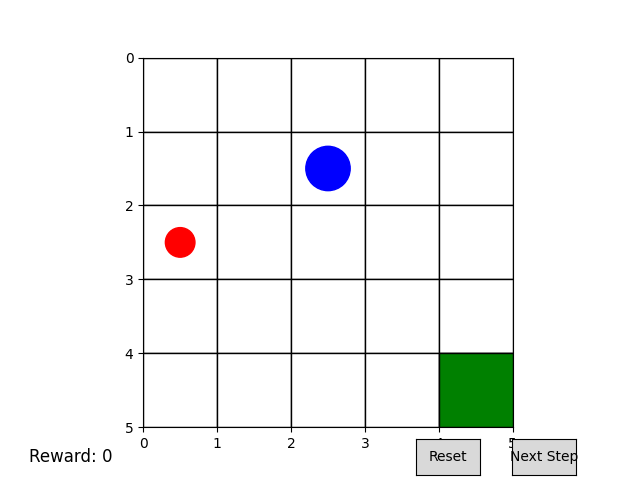

west
west
south
south
east
east
east
south
east
south
west
south
east
east
east
north
east
north
south
east
south
south
south
east
south
east
east
east
east
south
south
east
south
south
east
east
west
south
east
east
east


In [9]:
visualization = Visualization(env, agent)
# ani = FuncAnimation(visualization.fig, visualization.animate, frames=200, interval=400, repeat=False)
# plt.show()

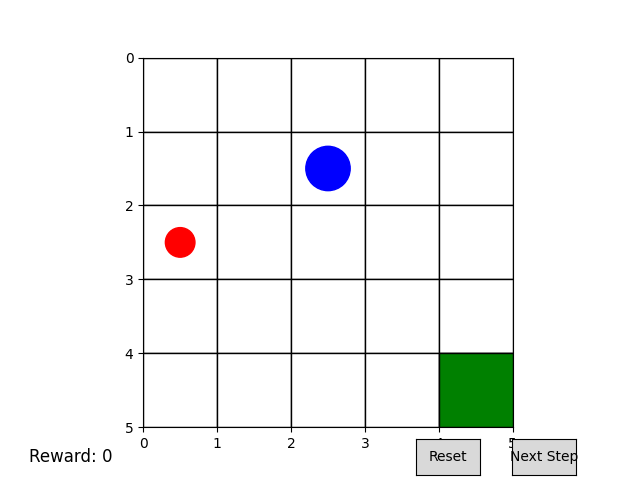

In [10]:
# env = Environment(size=5)
# agent = Agent(env)


ani = FuncAnimation(visualization.fig, visualization.animate, frames=200, interval=400, repeat=False)
plt.show()